In [1]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import os
import pandas as pd

In [43]:
file_to_load = "retirement.csv"
file_to_load

'retirement.csv'

In [44]:
retirement_df = pd.read_csv(file_to_load, encoding='UTF-8')
retirement_df.head(5)

,X,Y,FID,OGF_ID,MOH_PRO_ID,SERV_TYPE,SERV_DET,EN_NAME,FR_NAME,EN_ALT,FR_ALT,ADDRESS_1,ADDRESS_2,ADDR_DESCR,COMMUNITY,POSTALCODE,GEO_UPT_DT,EFF_DATE
0,-79.670559,43.592588,20,172386823,T0165,Retirement Home,,Evergreen Retirement Residence,,,,820 Scollard Court,,,Mississauga,L5V0A1,20220428140054,20220426154720
1,-77.141099,45.832070,30,172386730,N0062,Retirement Home,,Chartwell Pembroke Heritage Retirement Residence,,,,1111 Pembroke Street,,,Pembroke,K8A8P6,20220428140111,20220426154707
2,-77.787760,44.123855,43,172386849,N0007,Retirement Home,,Golden Pond Retirement Residence,,,,387 Goodrich Road,,,Codrington,K0K1R0,20220428140000,20220426154723
3,-81.241816,42.970855,44,172386853,S0386,Retirement Home,,Grand Wood Park,,,,81 Grand Avenue,,,London,N6C1M2,20220428140036,20220426154724
4,-75.755494,45.342838,65,172386775,N0410,Retirement Home,,City View Retirement Community,,,,151 Meadowlands Drive,,,Ottawa,K2G2S3,20220428140112,20220426154713


In [45]:
cleaned_df = retirement_df[['SERV_TYPE', 'EN_NAME', 'ADDRESS_1', 'COMMUNITY']]
cleaned_df.head()

,SERV_TYPE,EN_NAME,ADDRESS_1,COMMUNITY
0,Retirement Home,Evergreen Retirement Residence,820 Scollard Court,Mississauga
1,Retirement Home,Chartwell Pembroke Heritage Retirement Residence,1111 Pembroke Street,Pembroke
2,Retirement Home,Golden Pond Retirement Residence,387 Goodrich Road,Codrington
3,Retirement Home,Grand Wood Park,81 Grand Avenue,London
4,Retirement Home,City View Retirement Community,151 Meadowlands Drive,Ottawa


In [46]:
cleaned_df["COMMUNITY"].unique()

array(['Mississauga', 'Pembroke', 'Codrington', 'London', 'Ottawa',
       'Hamilton', 'Burlington', 'Kingston', 'Bruce Mines', 'Shelburne',
       'Toronto', 'Sarnia', 'Bradford West Gwillimbury', 'Madoc',
       'Elmira', 'Cornwall', 'Vaughan', 'Ingersoll', 'Uxbridge',
       'Hanover', 'Exeter', 'Peterborough', 'Tamworth', 'Cobourg',
       'Alexandria', 'Brighton', 'Orillia', 'Maryhill', 'Owen Sound',
       'Huntsville', 'Hensall', 'Lucan', 'Thunder Bay', 'Collingwood',
       'Pickering', 'Whitby', 'Delhi', 'Simcoe', 'Brampton', 'Kingsville',
       'Belleville', 'North Bay', 'Penetanguishene', 'New Tecumseth',
       'Brantford', 'Smiths Falls', 'Ripley', 'Townsend', 'Campbellford',
       'Carleton Place', 'Green Valley', 'Maberly', 'Kemptville',
       'Midland', 'Bracebridge', 'Brockville', 'Lefaivre',
       'Kawartha Lakes', 'Petrolia', 'Fort Erie', 'Timmins', 'Markham',
       'Guelph', 'Richmond Hill', 'Curran', 'Quinte West', 'Fergus',
       'Oakville', 'Kitchener', 'Gr

In [47]:
city_statistics = cleaned_df.groupby('COMMUNITY')


In [48]:
city_count = city_statistics["COMMUNITY"].count().sort_values(ascending = False)
city_count.head(10)

COMMUNITY
Ottawa         80
Toronto        76
Hamilton       33
Mississauga    23
London         20
Kitchener      15
Barrie         12
Windsor        12
Oakville       12
Burlington     11
Name: COMMUNITY, dtype: int64

In [50]:
city_count.to_csv('output/city_count.csv')

In [49]:
#cityplot = city_count.plot(kind='bar',figsize= (10,5),width=0.5)
#cityplot.set_xlabel('City')
#cityplot.set_ylabel ('Number of Retirement Home')

In [51]:
to_load = "output/city_count.csv"

In [52]:
city_plot  = pd.read_csv(to_load)
city_plot.head(10)

,COMMUNITY,COMMUNITY.1
0,Ottawa,80
1,Toronto,76
2,Hamilton,33
3,Mississauga,23
4,London,20
5,Kitchener,15
6,Barrie,12
7,Windsor,12
8,Oakville,12
9,Burlington,11


In [60]:
city_plot_summary = city_plot.rename(columns={'COMMUNITY': 'City', 'COMMUNITY.1': 'Number of Retirement Homes'})
city_plot_summary.head(10)

,City,Number of Retirement Homes
0,Ottawa,80
1,Toronto,76
2,Hamilton,33
3,Mississauga,23
4,London,20
5,Kitchener,15
6,Barrie,12
7,Windsor,12
8,Oakville,12
9,Burlington,11


In [80]:
#new_city = city_plot_summary[(city_plot_summary["Number of Retirement Homes"] > "Ottawa"  )]
#Ottawa_df

Text(0, 0.5, 'Number of Retirement Homes')

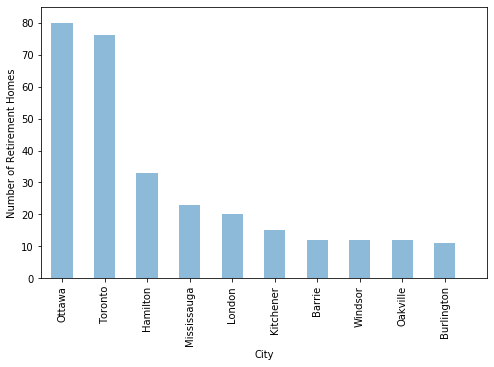

In [87]:
Homes = ['Ottawa','Toronto','Hamilton','Mississauga','London','Kitchener','Barrie','Windsor','Oakville', 'Burlington']
City = [80, 76, 33, 23, 20, 15, 12, 12, 12, 11]



tick_locations = [value for value in Homes]

plt.figure(figsize=(8,5))
plt.bar(Homes, City, alpha=0.5, align="center", width =  0.5)
plt.xticks(tick_locations,   rotation="90")

plt.xlim(-0.5, len(Homes))
plt.ylim(0, 85)

# Set a Title and labels
plt.xlabel("City")
plt.ylabel("Number of Retirement Homes")

In [91]:
plt.savefig("output/topTen.png")
plt.show()

<Figure size 432x288 with 0 Axes>